In [56]:
import pandas as pd

df=pd.read_csv('basket_analysis.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.tail(10)

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
989,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
990,False,False,True,True,False,False,True,False,False,True,True,True,True,True,False,False
991,False,True,False,False,False,True,False,True,False,True,True,False,False,True,False,True
992,True,False,True,False,True,False,False,True,True,False,False,False,True,False,False,False
993,False,False,True,False,False,True,False,False,False,False,False,True,True,True,False,True
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True
998,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


***Exploratory Data Analysis*** ***EDA***

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Apple         999 non-null    bool 
 1   Bread         999 non-null    bool 
 2   Butter        999 non-null    bool 
 3   Cheese        999 non-null    bool 
 4   Corn          999 non-null    bool 
 5   Dill          999 non-null    bool 
 6   Eggs          999 non-null    bool 
 7   Ice cream     999 non-null    bool 
 8   Kidney Beans  999 non-null    bool 
 9   Milk          999 non-null    bool 
 10  Nutmeg        999 non-null    bool 
 11  Onion         999 non-null    bool 
 12  Sugar         999 non-null    bool 
 13  Unicorn       999 non-null    bool 
 14  Yogurt        999 non-null    bool 
 15  chocolate     999 non-null    bool 
dtypes: bool(16)
memory usage: 15.7 KB


In [58]:
df.mean()

Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

***import some Libraries***

In [59]:
#Import all relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

***Preparing the Data***

In [60]:
df.isna().sum()

Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

In [61]:
#Check the distribution of transactions of Cheese .
distribution = df["Cheese"].value_counts().head(10)
distribution


Cheese
False    595
True     404
Name: count, dtype: int64

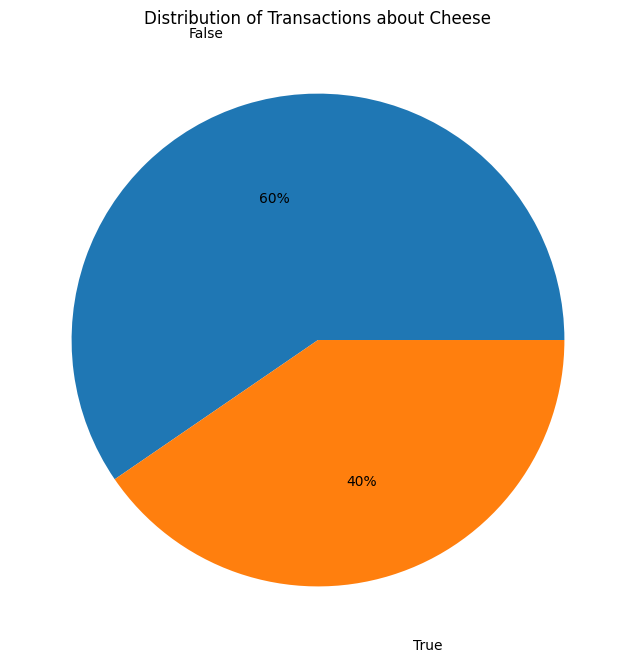

In [62]:
#Create a pie chart to show distribution of transactions
plt.figure(figsize=[8,8])
plt.pie(distribution,labels=distribution.index, autopct = '%0.0f%%',labeldistance=1.3)
plt.title("Distribution of Transactions about Cheese")
plt.show()

***Applying the apriori algorithm***

In [52]:
#Generate the frequent itemsets
frequent_itemsets = apriori(df, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

,support,itemsets
15,0.421421,(chocolate)
14,0.420420,(Yogurt)
2,0.420420,(Butter)
7,0.410410,(Ice cream)
12,0.409409,(Sugar)
8,0.408408,(Kidney Beans)
4,0.407407,(Corn)
9,0.405405,(Milk)
3,0.404404,(Cheese)
11,0.403403,(Onion)


***Applying association rules***

In [66]:
#Apply association rules
assoc_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
assoc_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Apple, Eggs, Unicorn)","(Corn, Sugar)",0.068068,0.187187,0.030030,0.441176,2.356873,0.017289,1.454507,0.617759
1,"(Corn, Sugar)","(Apple, Eggs, Unicorn)",0.187187,0.068068,0.030030,0.160428,2.356873,0.017289,1.110008,0.708292
2,"(Cheese, Unicorn)","(Eggs, Kidney Beans, Dill)",0.170170,0.075075,0.030030,0.176471,2.350588,0.017254,1.123123,0.692400
3,"(Eggs, Kidney Beans, Dill)","(Cheese, Unicorn)",0.075075,0.170170,0.030030,0.400000,2.350588,0.017254,1.383050,0.621212
4,"(Kidney Beans, Bread)","(Milk, Corn, Nutmeg)",0.167167,0.085085,0.033033,0.197605,2.322437,0.018810,1.140230,0.683712
...,...,...,...,...,...,...,...,...,...,...
31897,"(Cheese, Bread)","(Apple, Dill)",0.173173,0.179179,0.031031,0.179191,1.000065,0.000002,1.000014,0.000078
31898,(Onion),"(Apple, Kidney Beans)",0.403403,0.176176,0.071071,0.176179,1.000014,0.000001,1.000003,0.000024
31899,"(Apple, Kidney Beans)",(Onion),0.176176,0.403403,0.071071,0.403409,1.000014,0.000001,1.000010,0.000017
31900,(Milk),"(Apple, Ice cream, Bread)",0.405405,0.074074,0.030030,0.074074,1.000000,0.000000,1.000000,0.000000
